In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Splitting the data into X and y

In [4]:
X=df.drop(labels=['Survived'],axis=1)#features
y=df['Survived']#class_labels

# EDA
- Check the distributions
- Deal with Nan
- Find relation of the columns
- Convert categorical into numerical
- Scatter plot to find the linear

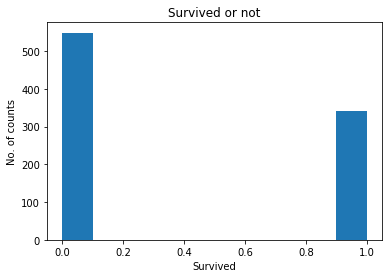

In [5]:
plt.hist(y)
plt.title('Survived or not')
plt.ylabel('No. of counts')
plt.xlabel('Survived')
plt.show()

In [6]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

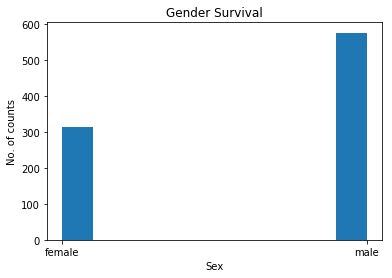

male      577
female    314
Name: Sex, dtype: int64


In [7]:
plt.hist(df['Sex'])
plt.title('Gender Survival')
plt.ylabel('No. of counts')
plt.xlabel('Sex')
plt.show()
print(df['Sex'].value_counts())

In [8]:
males_survived=df['Sex'][(df['Sex']=='male')&(df['Survived']==1)]
#males_survived.head()
males_not_survived=df['Sex'][(df['Sex']=='male')&(df['Survived']==0)]
females_survived=df['Sex'][(df['Sex']=='female')&(df['Survived']==1)]
females_not_survived=df['Sex'][(df['Sex']=='female')&(df['Survived']==0)]
print('Number of Survived Males:',males_survived.count())
print('Number of Survived Females:',females_survived.count())
print('Number of Not Survived Males:',males_not_survived.count())
print('Number of Not Survived Females:',females_not_survived.count())

Number of Survived Males: 109
Number of Survived Females: 233
Number of Not Survived Males: 468
Number of Not Survived Females: 81


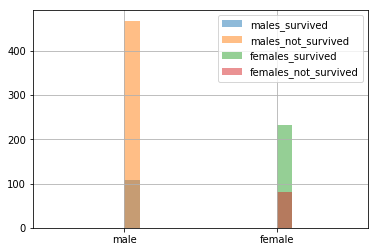

In [9]:
plt.hist(males_survived,alpha=0.5,label='males_survived')
plt.hist(males_not_survived,alpha=0.5,label='males_not_survived')
plt.hist(females_survived,alpha=0.5,label='females_survived')
plt.hist(females_not_survived,alpha=0.5,label='females_not_survived')
plt.grid()
plt.legend(loc='upper right')
plt.show()

In [10]:
df['Sex'].isnull().any()

False

In [11]:
d={'male':0,'female':1}
df['Sex']=df['Sex'].apply(lambda x:d[x])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


# Lets take a look at the Cabin

In [12]:
df.Cabin.shape

(891,)

In [13]:
print('They are ',df['Cabin'].isnull().sum(),' out of ',df['Cabin'].shape[0])
print(((df['Cabin'].isnull().sum()/df['Cabin'].shape[0])*100),' % of the data are NaN.')

They are  687  out of  891
77.10437710437711  % of the data are NaN.


Since they are more than 70% values in the data we will remove Cabin column rather than filling it.

In [14]:
df.drop(labels='Cabin',inplace=True,axis=1)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S


 We shall also remove ticket aswell as PassengerId and Name since ther are useless

In [15]:
df.drop(labels=['PassengerId','Ticket','Name'],inplace=True,axis=1)
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S


In [16]:
df.shape

(891, 8)

# Feature Embarked:


In [17]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Since they are three categories in Embarked Column we will be using One Hot Encoding

In [18]:
#One Hot Encoding
df=pd.get_dummies(df, columns=['Embarked'], prefix=["Embarked"])


In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


### Lets see if any null values exists in the column

In [20]:
df.isnull().any()

Survived      False
Pclass        False
Sex           False
Age            True
SibSp         False
Parch         False
Fare          False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool

**Observation:**
We can see that age is having some Null Values

#### Lets try to solve it

Lets find how much percentage they are from the Age Column

In [21]:
print((df['Age'].isnull().sum()/df['Age'].shape[0])*100,'% are Nan values')
print(df['Age'].isnull().sum(),' nulls')

19.865319865319865 % are Nan values
177  nulls


I can either use mean,median or feature importance to fill them.
- Since are only 20% of the whole data we can use feature importance
- To use feature importance lets find the correlation between the features

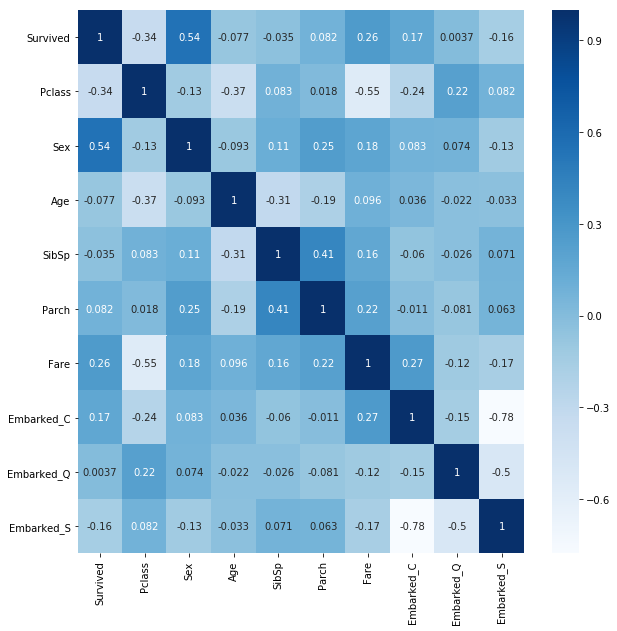

In [22]:
corr = df.corr()
import seaborn as sns
# plot the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True,cmap=plt.cm.Blues)
plt.show()

In [23]:
print(corr['Age'].sort_values(ascending=False)[1:])

Fare          0.096067
Embarked_C    0.036261
Embarked_Q   -0.022405
Embarked_S   -0.032523
Survived     -0.077221
Sex          -0.093254
Parch        -0.189119
SibSp        -0.308247
Pclass       -0.369226
Name: Age, dtype: float64


As we can see the correlation is not strong with other features, it is a bad idea to use feature modeling. We will be using mean to fill the NaN.

In [24]:
print(df['Age'].dtype)

float64


In [25]:
mean=df.Age.mean()
print(mean)
df['Age'].fillna(mean,inplace=True,axis=0)
df.Age.isnull().any()


29.69911764705882


False

In [26]:
print(df['Age'].dtype)

float64


In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


# Lets Check the best correlation for Survived column.

In [28]:
print(corr['Survived'].sort_values(ascending=False)[1:])

Sex           0.543351
Fare          0.257307
Embarked_C    0.168240
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.077221
Embarked_S   -0.155660
Pclass       -0.338481
Name: Survived, dtype: float64


**Observation:**
- From this we can say that Sex and PClass has a strong correlation for the column survived.

Lets standardize the data.

In [29]:
y=df['Survived']
X=df.drop(labels='Survived',axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1


In [30]:
X.dtypes

Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [31]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#Simple Cross Validation
def KNN_Cross_Validation(X,y,algorithm='kd_tree',acc_type='accuracy_score'):
    max_v=0
    cv_scores=[]
    # split the data set into train and test
    X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # split the train data set into cross validation train and cross validation test
    X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)
    neighbors = list(range(1,10,2))
    for i in neighbors:
        # instantiate learning model (k = 30)
        knn = KNeighborsClassifier(n_neighbors=i,algorithm=algorithm,n_jobs=-1)
         # fitting the model on crossvalidation train
        knn=knn.fit(X_tr, y_tr)
        # predict the response on the crossvalidation train
        pred = knn.predict(X_cv)
        # evaluate CV accuracy
        if(acc_type=='accuracy_score'):
            acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
        else:
            acc = f1_score(y_cv, pred) * float(100)
        print('\nCV accuracy for k = %d is %d%%' % (i, acc))
        cv_scores.append(acc)
        if(max_v<acc):
            max_v=acc
            optimal_model=knn
    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]
    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)
    # plot misclassification error vs k 
    plt.plot(neighbors, MSE)
    for xy in zip(neighbors, np.round(MSE,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()
    print("the misclassification error for each k value is : ", np.round(MSE,3))
    return optimal_k,optimal_model,X_test,y_test


CV accuracy for k = 1 is 72%

CV accuracy for k = 3 is 80%

CV accuracy for k = 5 is 81%

CV accuracy for k = 7 is 78%

CV accuracy for k = 9 is 78%

The optimal number of neighbors is 5.


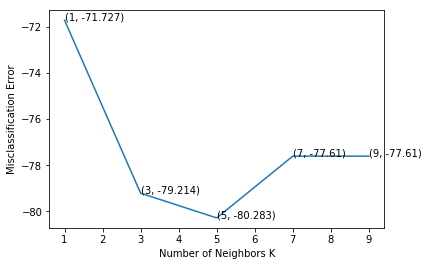

the misclassification error for each k value is :  [-71.727 -79.214 -80.283 -77.61  -77.61 ]


In [33]:
best_k,best_model,X_test,y_test=KNN_Cross_Validation(X,y)

In [34]:
def LR_SimpleCV(Xtrain,ytrain,Xcv,ycv,penalty='l2'):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import make_scorer
    import seaborn as sns
    import matplotlib.pyplot as plt
    C=[0.001,0.01,0.1,1,10,100,1000]
    train_accuracy=[]
    cv_accuracy=[]
    scores={}
    for i in C:
        model=LogisticRegression(penalty=penalty,C=i,n_jobs=-1)
        model=model.fit(Xtrain,ytrain)
        predict_train=model.predict_proba(Xtrain)[:,1]
        predict_cv=model.predict_proba(Xcv)[:,1]
        score_on_train=roc_auc_score(ytrain,predict_train)
        score_on_cv=roc_auc_score(ycv,predict_cv)
        scores[score_on_cv]=model
        train_accuracy.append(score_on_train)
        cv_accuracy.append(score_on_cv)
    plt.plot(np.log(C),train_accuracy,color='g')
    plt.plot(np.log(C),cv_accuracy,color='red')
    plt.grid()
    plt.title('Train and Cross Validation Scores')
    plt.xlabel('Hyperparameter (C)')
    plt.ylabel('roc_auc_score')
    plt.legend(['Train accuracy','CV accuracy'])
    plt.show()
    #Finding the efficient model
    best_score=max(scores,key=float)
    print('='*50,'Best Model','='*50,'\n')
    print('\t Best Model:',scores[best_score],'\n')
    print('\t Best CV Accuracy:',best_score,'\n')
    print('='*112,'\n')
    return scores[best_score]

In [35]:
from sklearn.model_selection import train_test_split
X_t,X_test,y_t,y_test=train_test_split(X,y,test_size=0.3)
X_train,X_cv,y_train,y_cv=train_test_split(X_t,y_t,test_size=0.3)

/Users/mohitpandrangi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


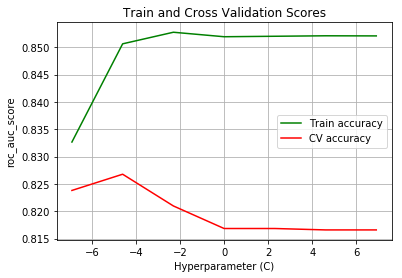

================================================== Best Model ================================================== 

	 Best Model: LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 

	 Best CV Accuracy: 0.8267741935483871 




In [36]:
LR_model=LR_SimpleCV(X_train,y_train,X_cv,y_cv)

In [37]:
from sklearn.metrics import roc_auc_score
pred_X_train=LR_model.predict_proba(X_train)[:,1]
pred_X_cv=LR_model.predict_proba(X_cv)[:,1]
pred_X_test=LR_model.predict_proba(X_test)[:,1]
print('Train accuracy:',roc_auc_score(y_train,pred_X_train))
print('Cv accuracy:',roc_auc_score(y_cv,pred_X_cv))
print('Test Accuracy:',roc_auc_score(y_test,pred_X_test))

Train accuracy: 0.8506424677684519
Cv accuracy: 0.8267741935483871
Test Accuracy: 0.8798619447779112


In [38]:
def roc_auc_plot(y_train_c,y_train_p,y_test_c,y_test_p):
    from sklearn.metrics import roc_curve, auc
    fpr_1, tpr_1, thresholds_1 = roc_curve(y_train_c, y_train_p)
    fpr_2, tpr_2, thresholds_2 = roc_curve(y_test_c, y_test_p)
    roc_auc_1 = auc(fpr_1, tpr_1)
    roc_auc_2 = auc(fpr_2, tpr_2)
    #print('Train Score:',roc_auc_1)
    #print('Test Score:',roc_auc_1)
    plt.figure()
    plt.plot(fpr_1, tpr_1, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc_1)
    plt.plot(fpr_2, tpr_2, color='green', lw=1, label='ROC curve (area = %0.2f)' % roc_auc_2)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.grid()
    plt.title('ROC and AUC')
    plt.legend(['Train roc curve','Test roc curve'])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    

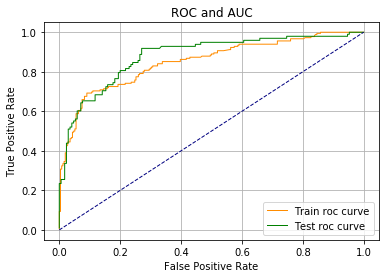

In [39]:
roc_auc_plot(y_train,pred_X_train,y_test,pred_X_test)

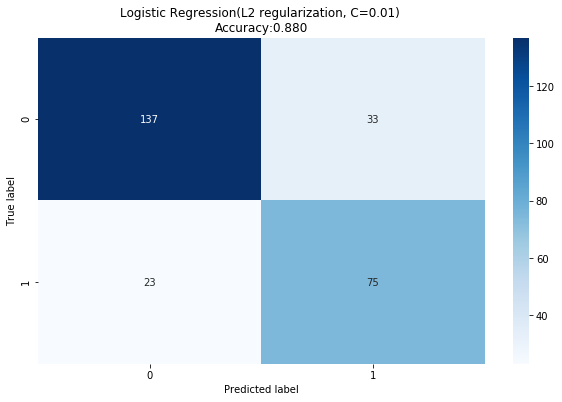

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test,pred_X_test.round()) 
cm_df = pd.DataFrame(cm,
                     index = [0,1]
                     ,columns = [0,1])
plt.figure(figsize=(10,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap=plt.cm.Blues)
plt.title('Logistic Regression(L2 regularization, C=0.01) \nAccuracy:{0:.3f}'.format(roc_auc_score(y_test,pred_X_test)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [41]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
test.drop(labels=['PassengerId','Name','Ticket','Cabin'],inplace=True,axis=1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [43]:
test=pd.get_dummies(test, columns=['Embarked'], prefix=["Embarked"])
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,male,34.5,0,0,7.8292,0,1,0
1,3,female,47.0,1,0,7.0000,0,0,1
2,2,male,62.0,0,0,9.6875,0,1,0
3,3,male,27.0,0,0,8.6625,0,0,1
4,3,female,22.0,1,1,12.2875,0,0,1


In [44]:
d={'male':0,'female':1}
test['Sex']=test['Sex'].apply(lambda x:d[x])
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1


In [45]:
test.isnull().any()

Pclass        False
Sex           False
Age            True
SibSp         False
Parch         False
Fare           True
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [47]:
mean_fare=test.Fare.mean()
mean_age=test.Age.mean()
test['Age'].fillna(mean_age,inplace=True,axis=0)
test['Fare'].fillna(mean_fare,inplace=True,axis=0)
print(test.isnull().any())

Pclass        False
Sex           False
Age           False
SibSp         False
Parch         False
Fare          False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool


In [48]:
test_std=StandardScaler().fit_transform(test)


In [49]:
predict_test=LR_model.predict(test_std)

In [54]:
test=pd.read_csv('test.csv')


In [62]:
submission = pd.DataFrame()
submission['PassengerId']=test['PassengerId']
submission['Survived']=predict_test
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [64]:
submission.to_csv('prediction.csv',index=False)